In [61]:
greetings = "Assalam-o-Alaikum!"
print(greetings)

Assalam-o-Alaikum!


### Import Libraries

In [92]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [63]:
import warnings
warnings.filterwarnings("ignore")

### Period Function

In [64]:
def f(x):
    if (x > 4) and (x <= 8):
        return 'Early Morning'
    elif (x > 8) and (x <= 12 ):
        return 'Morning'
    elif (x > 12) and (x <= 16):
        return'Noon'
    elif (x > 16) and (x <= 20) :
        return 'Evening'
    elif (x > 20) and (x <= 24):
        return'Night'
    elif (x <= 4):
        return'Late Night'

### Import Dataset

**Visits Dataset**

In [105]:
v = pd.read_csv("visits.txt", parse_dates = [1])
v.head()

,user_id,visit_time
0,943647ef-3682-4750-a2e1-918ba6f16188,2017-04-07 15:14:00
1,0c3a3dd0-fb64-4eac-bf84-ba069ce409f2,2017-01-26 14:24:00
2,6e0b2d60-4027-4d9a-babd-0e7d40859fb1,2017-08-20 08:23:00
3,6879527e-c5a6-4d14-b2da-50b85212b0ab,2017-11-04 18:15:00
4,a84327ff-5daa-4ba1-b789-d5b4caf81e96,2017-02-27 11:25:00


In [66]:
# Make Date and Time Columns
v["visit_time"] = v["visit_time"].astype("str")
v["visit_time"] = v["visit_time"].str.split(" ")
v["Date"] = v["visit_time"].str.get(0)
v["Time"] = v["visit_time"].str.get(1)
del v["visit_time"]

# Make Hour Column to identify session
v["Time2"] = v["Time"].str.split(":")
v["Hour"] = v["Time2"].str.get(0)
v["Hour"] = v["Hour"].astype("int")

# Apply Hour function
v['Period'] = v['Hour'].apply(f)

# Drop unnecessary columns
v = v.drop(columns = ["Time2", "Hour"])

In [67]:
v.head()

,user_id,Date,Time,Period
0,943647ef-3682-4750-a2e1-918ba6f16188,2017-04-07,15:14:00,Noon
1,0c3a3dd0-fb64-4eac-bf84-ba069ce409f2,2017-01-26,14:24:00,Noon
2,6e0b2d60-4027-4d9a-babd-0e7d40859fb1,2017-08-20,08:23:00,Early Morning
3,6879527e-c5a6-4d14-b2da-50b85212b0ab,2017-11-04,18:15:00,Evening
4,a84327ff-5daa-4ba1-b789-d5b4caf81e96,2017-02-27,11:25:00,Morning


In [68]:
# Visit Data Information
v.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   user_id  2000 non-null   object
 1   Date     2000 non-null   object
 2   Time     2000 non-null   object
 3   Period   2000 non-null   object
dtypes: object(4)
memory usage: 62.6+ KB


In [69]:
# Top 10 Frequent visits by Dates"
vd = v["Date"].value_counts().to_frame().reset_index()
vd.columns = ["Date", "Visits"]
vd.head(10)

,Date,Visits
0,2017-02-14,15
1,2017-08-09,14
2,2017-01-06,14
3,2017-09-22,14
4,2017-11-17,13
5,2017-11-21,13
6,2017-09-27,13
7,2017-05-27,13
8,2017-06-27,13
9,2017-02-16,12


In [70]:
# Top 10 Frequent visits by Time
vt = v["Time"].value_counts().to_frame().reset_index()
vt.columns = ["Time", "Visits"]
vt.head(10)

,Time,Visits
0,18:54:00,6
1,03:21:00,6
2,07:33:00,6
3,06:15:00,6
4,15:18:00,5
5,07:57:00,5
6,20:55:00,5
7,10:54:00,5
8,12:25:00,5
9,21:03:00,5


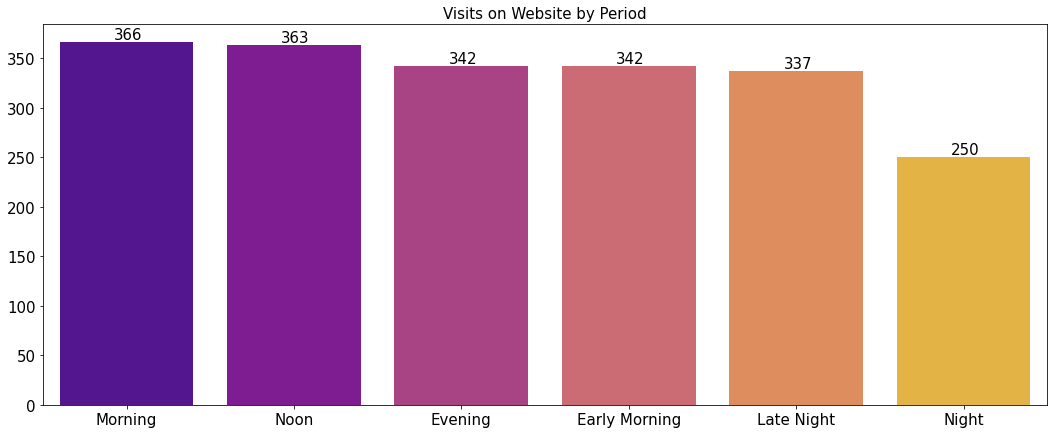

In [71]:
# Visits by Period
vp = v["Period"].value_counts().to_frame().reset_index()
vp.columns = ["Period", "Visits"]
vp

plt.figure(figsize = (18, 7))
graph = sns.barplot(x = "Period", y = "Visits", data = vp, palette = "plasma")
for p in graph.patches:
        graph.annotate('{:.0f}'.format(p.get_height()), 
                      (p.get_x()+0.41, p.get_height()),
                       ha='center', va='bottom',color= 'black', size = 15)
plt.title("Visits on Website by Period", size = 15)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.xlabel(None)
plt.ylabel(None)
plt.show()

**Cart Dataset**

In [106]:
c = pd.read_csv("cart.txt", parse_dates = [1])
c.sample(5)

,user_id,cart_time
30,aaf56850-1f1b-491c-b075-c985c63d32d1,2017-07-08 03:56:00
120,0b4f8bd2-d346-4cca-aec0-d6333abe9c56,2017-03-19 05:26:00
54,a5be8985-4570-479a-a4fa-211dd82386cf,2017-09-15 20:37:00
108,a25aad6a-55af-4ddc-92d1-e8c58f855329,2017-01-05 19:44:00
325,76b71c21-8735-4704-8fa7-93e46c5e7b8b,2017-04-02 21:18:00


In [73]:
# Make Date and Time Columns
c["cart_time"] = c["cart_time"].astype("str")
c["cart_time"] = c["cart_time"].str.split(" ")
c["Date"] = c["cart_time"].str.get(0)
c["Time"] = c["cart_time"].str.get(1)
del c["cart_time"]

# Make Hour Column to identify session
c["Time2"] = c["Time"].str.split(":")
c["Hour"] = c["Time2"].str.get(0)
c["Hour"] = c["Hour"].astype("int")

# Apply Hour function
c['Period'] = c['Hour'].apply(f)

# Drop unnecessary columns
c = c.drop(columns = ["Time2", "Hour"])

In [74]:
c.head()

,user_id,Date,Time,Period
0,2be90e7c-9cca-44e0-bcc5-124b945ff168,2017-11-07,20:45:00,Evening
1,4397f73f-1da3-4ab3-91af-762792e25973,2017-05-27,01:35:00,Late Night
2,a9db3d4b-0a0a-4398-a55a-ebb2c7adf663,2017-03-04,10:38:00,Morning
3,b594862a-36c5-47d5-b818-6e9512b939b3,2017-09-27,08:22:00,Early Morning
4,a68a16e2-94f0-4ce8-8ce3-784af0bbb974,2017-07-26,15:48:00,Noon


In [75]:
c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   user_id  400 non-null    object
 1   Date     400 non-null    object
 2   Time     400 non-null    object
 3   Period   400 non-null    object
dtypes: object(4)
memory usage: 12.6+ KB


In [76]:
# Most Visits to cart by date
cd = c["Date"].value_counts().to_frame().reset_index()
cd.columns = ["Date", "Cart"]
cd.head()

,Date,Cart
0,2017-05-12,6
1,2017-11-20,6
2,2017-01-26,6
3,2017-11-21,5
4,2017-01-05,5


In [77]:
# Most Visits to cart by Time
ct = c["Time"].value_counts().to_frame().reset_index()
ct.columns = ["Time", "Cart"]
ct.head()

,Time,Cart
0,08:22:00,4
1,22:25:00,3
2,22:53:00,3
3,08:32:00,3
4,17:00:00,3


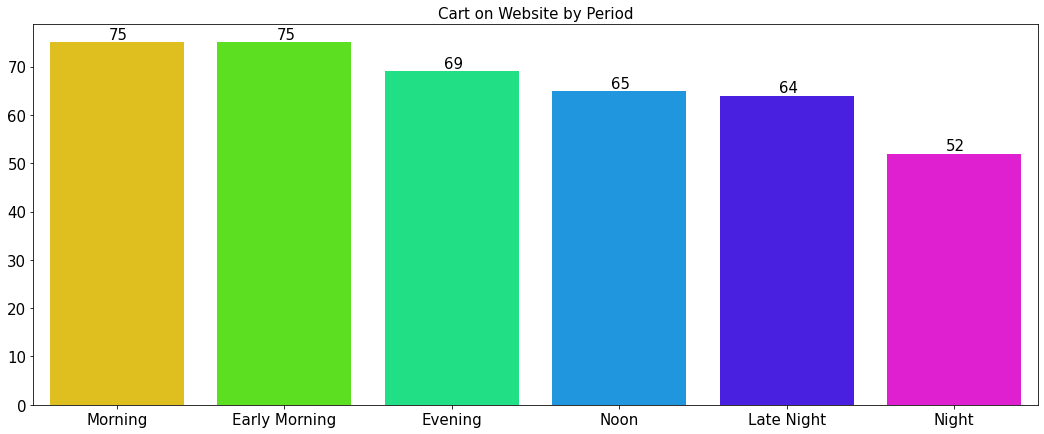

In [78]:
# Most Visits to cart by Period
cp = c["Period"].value_counts().to_frame().reset_index()
cp.columns = ["Period", "Cart"]
cp

plt.figure(figsize = (18, 7))
graph = sns.barplot(x = "Period", y = "Cart", data = cp, palette = "hsv")
for p in graph.patches:
        graph.annotate('{:.0f}'.format(p.get_height()), 
                      (p.get_x()+0.41, p.get_height()),
                       ha='center', va='bottom',color= 'black', size = 15)
plt.title("Cart on Website by Period", size = 15)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.xlabel(None)
plt.ylabel(None)
plt.show()

**Checkout Dataset**

In [107]:
co = pd.read_csv("checkout.txt", parse_dates = [1])
co.sample(5)

,user_id,checkout_time
37,7ee65388-0200-447f-acfd-93568e4fcc03,2017-05-18 07:00:00
292,70688015-a755-4b8a-a963-3528d85c8048,2017-09-24 07:45:00
252,21dec5fa-999a-45c5-b59b-18a1ee161379,2017-03-17 12:43:00
359,d2cb350b-2201-4290-b2e0-84a8bf0d6883,2017-08-08 16:14:00
324,ec7233f0-29e6-43a8-a5c1-260b9c754200,2017-05-12 09:17:00


In [80]:
# Make Date and Time Columns
co["checkout_time"] = co["checkout_time"].astype("str")
co["checkout_time"] = co["checkout_time"].str.split(" ")
co["Date"] = co["checkout_time"].str.get(0)
co["Time"] = co["checkout_time"].str.get(1)
del co["checkout_time"]

# Make Hour Column to identify session
co["Time2"] = co["Time"].str.split(":")
co["Hour"] = co["Time2"].str.get(0)
co["Hour"] = co["Hour"].astype("int")

# Apply Hour function
co['Period'] = co['Hour'].apply(f)

# Drop unnecessary columns
co = co.drop(columns = ["Time2", "Hour"])

In [81]:
co.head()

,user_id,Date,Time,Period
0,d33bdc47-4afa-45bc-b4e4-dbe948e34c0d,2017-06-25,09:29:00,Morning
1,4ac186f0-9954-4fea-8a27-c081e428e34e,2017-04-07,20:11:00,Evening
2,3c9c78a7-124a-4b77-8d2e-e1926e011e7d,2017-07-13,11:38:00,Morning
3,89fe330a-8966-4756-8f7c-3bdbcd47279a,2017-04-20,16:15:00,Noon
4,3ccdaf69-2d30-40de-b083-51372881aedd,2017-01-08,20:52:00,Evening


In [82]:
# Most visits to checkout by date
cod = co["Date"].value_counts().to_frame().reset_index()
cod.columns = ["Date", "Checkout"]
cod.head()

,Date,Checkout
0,2017-03-17,8
1,2017-06-25,7
2,2017-08-09,6
3,2017-11-20,6
4,2017-01-05,6


In [83]:
# Most Visits to checkout by Time
cot = co["Time"].value_counts().to_frame().reset_index()
cot.columns = ["Time", "Checkout"]
cot.head()

,Time,Checkout
0,12:55:00,4
1,20:52:00,3
2,09:18:00,3
3,22:42:00,3
4,11:32:00,3


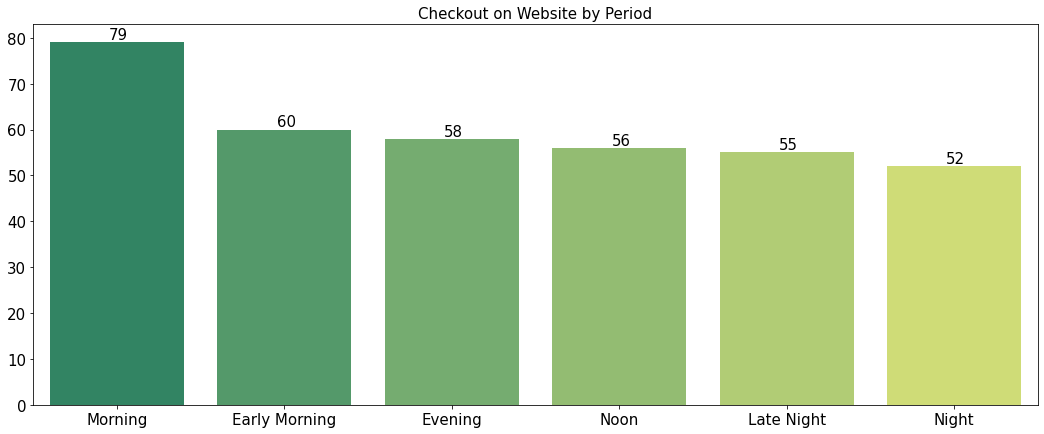

In [84]:
# Most Visits to checkout by Period
cop = co["Period"].value_counts().to_frame().reset_index()
cop.columns = ["Period", "Checkout"]
cop.head()


plt.figure(figsize = (18, 7))
graph = sns.barplot(x = "Period", y = "Checkout", data = cop, palette = "summer")
for p in graph.patches:
        graph.annotate('{:.0f}'.format(p.get_height()), 
                      (p.get_x()+0.41, p.get_height()),
                       ha='center', va='bottom',color= 'black', size = 15)
plt.title("Checkout on Website by Period", size = 15)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.xlabel(None)
plt.ylabel(None)
plt.show()

**Purchase Dataset**

In [108]:
p = pd.read_csv("purchase.txt", parse_dates = [1])
p.sample(5)

,user_id,purchase_time
5,5ae833dc-8866-4baa-9617-2009d6474ffa,2017-07-26 16:46:00
106,18022519-056b-4270-b777-643baa5aeb95,2017-09-14 17:45:00
193,89fe330a-8966-4756-8f7c-3bdbcd47279a,2017-04-20 16:15:00
30,f413cd55-d85f-4659-802e-33fb14b20c0f,2017-08-09 10:20:00
180,13019e8b-8ec9-4adc-9660-8c6337575ab8,2017-07-20 12:41:00


In [86]:
p["purchase_time"] = p["purchase_time"].astype("str")
p["purchase_time"] = p["purchase_time"].str.split(" ")
p["Date"] = p["purchase_time"].str.get(0)
p["Time"] = p["purchase_time"].str.get(1)
del p["purchase_time"]


# Make Hour Column to identify session
p["Time2"] = p["Time"].str.split(":")
p["Hour"] = p["Time2"].str.get(0)
p["Hour"] = p["Hour"].astype("int")

# Apply Hour function
p['Period'] = p['Hour'].apply(f)

# Drop unnecessary columns
p = p.drop(columns = ["Time2", "Hour"])

In [87]:
p.head()

,user_id,Date,Time,Period
0,4b44ace4-2721-47a0-b24b-15fbfa2abf85,2017-05-11,04:25:00,Late Night
1,02e684ae-a448-408f-a9ff-dcb4a5c99aac,2017-09-05,08:45:00,Early Morning
2,4b4bc391-749e-4b90-ab8f-4f6e3c84d6dc,2017-11-20,20:49:00,Evening
3,a5dbb25f-3c36-4103-9030-9f7c6241cd8d,2017-01-22,15:18:00,Noon
4,46a3186d-7f5a-4ab9-87af-84d05bfd4867,2017-06-11,11:32:00,Morning


In [88]:
# Most Purchases by Date
pd = p["Date"].value_counts().to_frame().reset_index()
pd.columns = ["Date", "Purchases"]
pd.head()

,Date,Purchases
0,2017-06-25,9
1,2017-01-11,7
2,2017-10-12,6
3,2017-08-09,5
4,2017-09-15,5


In [89]:
# Most Purchases by Time
pt = p["Time"].value_counts().to_frame().reset_index()
pt.columns = ["Time", "Purchases"]
pt.head()

,Time,Purchases
0,18:13:00,2
1,00:51:00,2
2,11:19:00,2
3,07:56:00,2
4,08:05:00,2


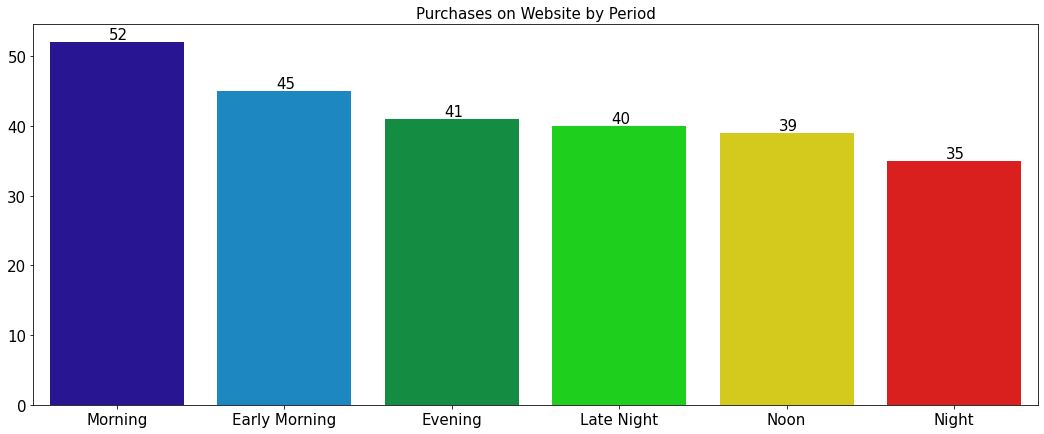

In [90]:
# Most Purchases by Period
pp = p["Period"].value_counts().to_frame().reset_index()
pp.columns = ["Period", "Purchases"]
pp

plt.figure(figsize = (18, 7))
graph = sns.barplot(x = "Period", y = "Purchases", data = pp, palette = "nipy_spectral")
for p in graph.patches:
        graph.annotate('{:.0f}'.format(p.get_height()), 
                      (p.get_x()+0.41, p.get_height()),
                       ha='center', va='bottom',color= 'black', size = 15)
plt.title("Purchases on Website by Period", size = 15)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.xlabel(None)
plt.ylabel(None)
plt.show()

## Analytics

**Merge visit and cart**

In [93]:
vc = pd.merge(v, c, on = "user_id", how = "left")
vc.head()

,user_id,Date_x,Time_x,Period_x,Date_y,Time_y,Period_y
0,943647ef-3682-4750-a2e1-918ba6f16188,2017-04-07,15:14:00,Noon,NaN,NaN,NaN
1,0c3a3dd0-fb64-4eac-bf84-ba069ce409f2,2017-01-26,14:24:00,Noon,2017-01-26,14:44:00,Noon
2,6e0b2d60-4027-4d9a-babd-0e7d40859fb1,2017-08-20,08:23:00,Early Morning,2017-08-20,08:31:00,Early Morning
3,6e0b2d60-4027-4d9a-babd-0e7d40859fb1,2017-08-20,08:23:00,Early Morning,2017-08-20,08:49:00,Early Morning
4,6879527e-c5a6-4d14-b2da-50b85212b0ab,2017-11-04,18:15:00,Evening,NaN,NaN,NaN


In [94]:
print("Total visits + cart =", len(vc))

Total visits + cart = 2052


**Customers go to website but not to cart**

In [95]:
vcn = vc[vc["Time_y"].isnull()]
vcn.head()

,user_id,Date_x,Time_x,Period_x,Date_y,Time_y,Period_y
0,943647ef-3682-4750-a2e1-918ba6f16188,2017-04-07,15:14:00,Noon,NaN,NaN,NaN
4,6879527e-c5a6-4d14-b2da-50b85212b0ab,2017-11-04,18:15:00,Evening,NaN,NaN,NaN
5,a84327ff-5daa-4ba1-b789-d5b4caf81e96,2017-02-27,11:25:00,Morning,NaN,NaN,NaN
6,7bc62113-d51d-4e6b-85e0-1cf29e3de74a,2017-06-03,20:05:00,Evening,NaN,NaN,NaN
7,6f22cd44-bc63-4449-a9af-2651859da2f9,2017-03-18,23:09:00,Night,NaN,NaN,NaN


In [96]:
print("Customers visit website page but not go to cart =", len(vcn))

Customers visit website page but not go to cart = 1652


In [97]:
# Go to Cart
gtc = len(vc) - len(vcn)
print("Customers go to cart =", gtc)

Customers go to cart = 400


In [98]:
# % People go to Website but not to cart
print("% Customers go from website page to cart = ", (len(vcn) / len(vc)) * 100)

% Customers go from website page to cart =  80.50682261208577


**Merge cart and checkout**

In [99]:
cc = pd.merge(c, co, on = "user_id", how = "left")
cc.head()


,user_id,Date_x,Time_x,Period_x,Date_y,Time_y,Period_y
0,2be90e7c-9cca-44e0-bcc5-124b945ff168,2017-11-07,20:45:00,Evening,2017-11-07,21:14:00,Night
1,2be90e7c-9cca-44e0-bcc5-124b945ff168,2017-11-07,20:45:00,Evening,2017-11-07,20:50:00,Evening
2,2be90e7c-9cca-44e0-bcc5-124b945ff168,2017-11-07,20:45:00,Evening,2017-11-07,21:11:00,Night
3,4397f73f-1da3-4ab3-91af-762792e25973,2017-05-27,01:35:00,Late Night,NaN,NaN,NaN
4,a9db3d4b-0a0a-4398-a55a-ebb2c7adf663,2017-03-04,10:38:00,Morning,2017-03-04,11:04:00,Morning


In [100]:
print("Cart + Checkout =", len(cc))

Cart + Checkout = 602


In [101]:
# Customers in cart but not go to checkout
cnc = cc[cc["Time_y"].isnull()]
print("Customers in cart but not go to checkout =", len(cnc))

Customers in cart but not go to checkout = 126


In [102]:
# Customers go from cart to checkout
print("Customers go from cart to checkout = ", len(cc) - len(cnc))

Customers go from cart to checkout =  476


In [103]:
# % of Customers go to checkout
print("% of Customers go to checkout =", (len(cnc) / len(cc) * 100))

% of Customers go to checkout = 20.930232558139537


**Merge Checkout and Purchase**

In [109]:
cop = pd.merge(co, p, on = "user_id", how = "left")
cop.head()

,user_id,checkout_time,purchase_time
0,d33bdc47-4afa-45bc-b4e4-dbe948e34c0d,2017-06-25 09:29:00,2017-06-25 09:49:00
1,d33bdc47-4afa-45bc-b4e4-dbe948e34c0d,2017-06-25 09:29:00,2017-06-25 09:56:00
2,d33bdc47-4afa-45bc-b4e4-dbe948e34c0d,2017-06-25 09:29:00,2017-06-25 09:57:00
3,4ac186f0-9954-4fea-8a27-c081e428e34e,2017-04-07 20:11:00,NaT
4,3c9c78a7-124a-4b77-8d2e-e1926e011e7d,2017-07-13 11:38:00,NaT


In [110]:
# Customers in checkout but not go for purchase
np = cop[cop["purchase_time"].isnull()]
print("Customers not go for purchase =", len(np))

Customers not go for purchase = 101


In [111]:
# Customers go from checkout to purchase
print("Customers proceed to checkout = ", (len(cop) - len(np)))

Customers proceed to checkout =  497


In [112]:
# % Customers go for purchase
print("% Customers go for purchase", (len(np) / len(cop)) * 100)

% Customers go for purchase 16.88963210702341


**Merge All Data**

In [113]:
all_data = v.merge(c, on = "user_id", how = "left").merge(co, on = "user_id", how = "left").merge(p, on = "user_id", how = "left")
all_data.head()

,user_id,visit_time,cart_time,checkout_time,purchase_time
0,943647ef-3682-4750-a2e1-918ba6f16188,2017-04-07 15:14:00,NaT,NaT,NaT
1,0c3a3dd0-fb64-4eac-bf84-ba069ce409f2,2017-01-26 14:24:00,2017-01-26 14:44:00,2017-01-26 14:54:00,2017-01-26 15:08:00
2,6e0b2d60-4027-4d9a-babd-0e7d40859fb1,2017-08-20 08:23:00,2017-08-20 08:31:00,NaT,NaT
3,6e0b2d60-4027-4d9a-babd-0e7d40859fb1,2017-08-20 08:23:00,2017-08-20 08:49:00,NaT,NaT
4,6879527e-c5a6-4d14-b2da-50b85212b0ab,2017-11-04 18:15:00,NaT,NaT,NaT


In [114]:
print("All Data Length = ", len(all_data))

All Data Length =  2594


In [115]:
# Customers not go for purchase
apnp = all_data[all_data["purchase_time"].isnull()]
apnp.head()

,user_id,visit_time,cart_time,checkout_time,purchase_time
0,943647ef-3682-4750-a2e1-918ba6f16188,2017-04-07 15:14:00,NaT,NaT,NaT
2,6e0b2d60-4027-4d9a-babd-0e7d40859fb1,2017-08-20 08:23:00,2017-08-20 08:31:00,NaT,NaT
3,6e0b2d60-4027-4d9a-babd-0e7d40859fb1,2017-08-20 08:23:00,2017-08-20 08:49:00,NaT,NaT
4,6879527e-c5a6-4d14-b2da-50b85212b0ab,2017-11-04 18:15:00,NaT,NaT,NaT
5,a84327ff-5daa-4ba1-b789-d5b4caf81e96,2017-02-27 11:25:00,NaT,NaT,NaT


In [116]:
# Total People Not go for Purchase when they reach to purchase item
print((len(all_data) - len(apnp)), "Null Purchases Out of", len(all_data))

696 Null Purchases Out of 2594


**Time to Purchase**

In [132]:
purchases = all_data[~all_data["purchase_time"].isnull()]
purchases.head()

,user_id,visit_time,cart_time,checkout_time,purchase_time
1,0c3a3dd0-fb64-4eac-bf84-ba069ce409f2,2017-01-26 14:24:00,2017-01-26 14:44:00,2017-01-26 14:54:00,2017-01-26 15:08:00
15,486480e2-98c3-4d51-8f4b-b1c07228ce84,2017-01-27 16:34:00,2017-01-27 16:44:00,2017-01-27 17:10:00,2017-01-27 17:12:00
50,3ccdaf69-2d30-40de-b083-51372881aedd,2017-01-08 20:21:00,2017-01-08 20:38:00,2017-01-08 20:52:00,2017-01-08 21:02:00
51,3ccdaf69-2d30-40de-b083-51372881aedd,2017-01-08 20:21:00,2017-01-08 20:38:00,2017-01-08 20:52:00,2017-01-08 21:21:00
52,3ccdaf69-2d30-40de-b083-51372881aedd,2017-01-08 20:21:00,2017-01-08 20:38:00,2017-01-08 20:52:00,2017-01-08 21:02:00


In [133]:
purchases['time_to_purchase'] = purchases["purchase_time"] - purchases["visit_time"]
purchases.head()

,user_id,visit_time,cart_time,checkout_time,purchase_time,time_to_purchase
1,0c3a3dd0-fb64-4eac-bf84-ba069ce409f2,2017-01-26 14:24:00,2017-01-26 14:44:00,2017-01-26 14:54:00,2017-01-26 15:08:00,0 days 00:44:00
15,486480e2-98c3-4d51-8f4b-b1c07228ce84,2017-01-27 16:34:00,2017-01-27 16:44:00,2017-01-27 17:10:00,2017-01-27 17:12:00,0 days 00:38:00
50,3ccdaf69-2d30-40de-b083-51372881aedd,2017-01-08 20:21:00,2017-01-08 20:38:00,2017-01-08 20:52:00,2017-01-08 21:02:00,0 days 00:41:00
51,3ccdaf69-2d30-40de-b083-51372881aedd,2017-01-08 20:21:00,2017-01-08 20:38:00,2017-01-08 20:52:00,2017-01-08 21:21:00,0 days 01:00:00
52,3ccdaf69-2d30-40de-b083-51372881aedd,2017-01-08 20:21:00,2017-01-08 20:38:00,2017-01-08 20:52:00,2017-01-08 21:02:00,0 days 00:41:00


In [135]:
purchases['time_to_purchase'] = purchases['time_to_purchase'].astype("str")
purchases['time_to_purchase'] = purchases['time_to_purchase'].str.split(" ")
purchases["Time To Purchase"] = purchases["time_to_purchase"].str.get(2)
del purchases["time_to_purchase"]

In [136]:
purchases.head()

,user_id,visit_time,cart_time,checkout_time,purchase_time,Time To Purchase
1,0c3a3dd0-fb64-4eac-bf84-ba069ce409f2,2017-01-26 14:24:00,2017-01-26 14:44:00,2017-01-26 14:54:00,2017-01-26 15:08:00,00:44:00
15,486480e2-98c3-4d51-8f4b-b1c07228ce84,2017-01-27 16:34:00,2017-01-27 16:44:00,2017-01-27 17:10:00,2017-01-27 17:12:00,00:38:00
50,3ccdaf69-2d30-40de-b083-51372881aedd,2017-01-08 20:21:00,2017-01-08 20:38:00,2017-01-08 20:52:00,2017-01-08 21:02:00,00:41:00
51,3ccdaf69-2d30-40de-b083-51372881aedd,2017-01-08 20:21:00,2017-01-08 20:38:00,2017-01-08 20:52:00,2017-01-08 21:21:00,01:00:00
52,3ccdaf69-2d30-40de-b083-51372881aedd,2017-01-08 20:21:00,2017-01-08 20:38:00,2017-01-08 20:52:00,2017-01-08 21:02:00,00:41:00


**Average, Minimum, Maximum Time spend in Purchasing**

In [139]:
print("Minimum Time Spend in Purchasing =", purchases["Time To Purchase"].min() ,"\n")
print("Maximum Time Spend in Purchasing =", purchases["Time To Purchase"].max() ,"\n")

Minimum Time Spend in Purchasing = 00:09:00 

Maximum Time Spend in Purchasing = 01:17:00 



**Top 10 by Time Spend**

In [147]:
sp = purchases.groupby("user_id")["Time To Purchase"].agg(["count", "min", "max"]).sort_values(by = "count", ascending = False)
sp = sp.head(10)
sp

,count,min,max
user_id,,,
21dec5fa-999a-45c5-b59b-18a1ee161379,40,00:23:00,00:45:00
8fac45c9-8d29-45e0-a07e-c892ca19387a,36,00:29:00,00:51:00
adcf4eb4-4405-4f0e-b140-d76f336e880d,32,00:34:00,01:05:00
20da6a89-e211-4ea9-99bb-e2e62f03d213,24,00:40:00,00:59:00
8e5273d1-0eb4-4e56-92cb-b6d0e6a4da6e,24,00:30:00,00:45:00
bf144bd6-4681-4edb-81b9-df31ee275211,20,00:47:00,00:53:00
f84d6a17-dad9-4820-967c-d1ee33f1cd17,18,00:24:00,00:40:00
c0c43343-c337-4ba9-8df7-d2ec441d8823,18,00:50:00,01:17:00
899e294f-ccbe-4825-86a8-200495a46280,18,00:59:00,01:07:00
